In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [ ]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA18_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,CF,88.0,€198.9M
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,86.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,€72.3M
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,79.0,78.0,9.0,8.0,10.0,11.0,10.0,CF,81.0,€37.3M
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,82.0,80.0,5.0,7.0,14.0,15.0,9.0,LB,82.0,€66.4M
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,70.0,68.0,5.0,6.0,2.0,4.0,3.0,CM,85.0,€146.3M


In [3]:
#Diff between 17 and 18 is that 18 has an extra column called 'Release Clause'

## DATA STRUCTURE/SHAPE/INFO

In [4]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17927 non-null  int64  
 1   Name                      17927 non-null  object 
 2   Age                       17927 non-null  int64  
 3   Photo                     17927 non-null  object 
 4   Nationality               17927 non-null  object 
 5   Flag                      17927 non-null  object 
 6   Overall                   17927 non-null  int64  
 7   Potential                 17927 non-null  int64  
 8   Club                      17675 non-null  object 
 9   Club Logo                 17927 non-null  object 
 10  Value                     17927 non-null  object 
 11  Wage                      17927 non-null  object 
 12  Special                   17927 non-null  int64  
 13  Preferred Foot            17927 non-null  object 
 14  Intern

In [5]:
pandas_df.shape

(17927, 64)

In [6]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKPositioning          float64
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
Length: 64, dtype: object

In [ ]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA18_official_data.csv')

In [8]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str
176580,""" L. Suárez""",30,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",92,92,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€97M""","""€500K""",2321,"""Right""",5.0,4.0,4.0,"""High/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos26"">LS""",9.0,"""Jul 11, 2014""","""nan""","""2021""","""6'0""","""190lbs""",77.0,94.0,77.0,83.0,88.0,86.0,86.0,84.0,64.0,91.0,88.0,77.0,86.0,93.0,78.0,87.0,69.0,89.0,83.0,86.0,87.0,41.0,92.0,84.0,85.0,85.0,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""CF""",88.0,"""€198.9M"""
178518,""" R. Nainggolan""",29,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",86,86,"""Roma""","""https://cdn.sofifa.com/teams/5…","""€42.5M""","""€130K""",2286,"""Right""",3.0,3.0,3.0,"""High/ High""","""Stocky (170-185)""","""Yes""","""<span class=""pos pos13"">RCM""",4.0,"""Jan 7, 2014""","""nan""","""2021""","""5'9""","""170lbs""",73.0,76.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,80.0,76.0,81.0,87.0,84.0,84.0,76.0,94.0,76.0,86.0,88.0,86.0,88.0,76.0,63.0,84.0,78.0,86.0,88.0,11.0,11.0,14.0,8.0,11.0,"""CDM""",84.0,"""€72.3M"""
203551,""" A. Florenzi""",26,"""https://cdn.sofifa.com/players…","""Italy""","""https://cdn.sofifa.com/flags/i…",82,83,"""Roma""","""https://cdn.sofifa.com/teams/5…","""€21M""","""€70K""",2267,"""Right""",3.0,3.0,3.0,"""High/ Medium""","""Lean (170-185)""","""Yes""","""<span class=""pos pos3"">RB""",24.0,"""Jul 1, 2010""","""nan""","""2023""","""5'8""","""148lbs""",77.0,76.0,70.0,82.0,87.0,79.0,73.0,79.0,75.0,84.0,86.0,84.0,87.0,79.0,84.0,82.0,74.0,90.0,68.0,82.0,79.0,77.0,82.0,76.0,76.0,80.0,74.0,79.0,78.0,9.0,8.0,10.0,11.0,10.0,"""CF""",81.0,"""€37.3M"""
197445,""" D. Alaba""",25,"""https://cdn.sofifa.com/players…","""Austria""","""https://cdn.sofifa.com/flags/a…",85,87,"""FC Bayern München""","""https://cdn.sofifa.com/teams/2…","""€38.5M""","""€130K""",2263,"""Left""",4.0,4.0,3.0,"""High/ Medium""","""Lean (170-185)""","""Yes""","""<span class=""pos pos7"">LB""",27.0,"""Feb 10, 2010""","""nan""","""2021""","""5'11""","""168lbs""",81.0,63.0,75.0,82.0,68.0,79.0,78.0,85.0,80.0,83.0,86.0,81.0,79.0,84.0,77.0,83.0,82.0,87.0,69.0,83.0,69.0,84.0,77.0,78.0,80.0,79.0,78.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,"""LB""",82.0,"""€66.4M"""
195864,""" P. Pogba""",24,"""https://cdn.sofifa.com/players…","""France""","""https://cdn.sofifa.com/flags/f…",88,92,"""Manchester United""","""https://cdn.sofifa.com/teams/1…","""€76M""","""€250K""",2262,"""Right""",4.0,4.0,5.0,"""High/ Low""","""Lean (185+)""","""Yes""","""<span class=""pos pos15"">LCM""",6.0,"""Aug 9, 2016""","""nan""","""2021""","""6'3""","""185lbs""",80.0,73.0,75.0,87.0,85.0,87.0,84.0,82.0,88.0,89.0,75.0,78.0,76.0,84.0,63.0,90.0,85.0,91.0,91.0,82.0,78.0,70.0,83.0,88.0,76.0,87.0,64.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,"""CM""",85.0,"""€146.3M"""
173731,""" G. Bale""",27,"""https://cdn.sofifa.com/players…","""Wales""","""https://cdn.sofifa.com/flags/g…",88,88,"""Real Madrid""","""https://cdn.sofifa.com/teams/2…","""€62M""","""€375K""",2260,"""Left""",4.0,3.0,4.0,

In [9]:
polars_df.shape

(17927, 64)

In [10]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64,
 String]

In [11]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17927  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 64     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA %           ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID              │  0 │              0 │ 210900 │  31100 │  16 │ 197800 │ 216600 │ 233800 │ 248100 │    ▁▃▇ │  │
│ │ Age             │  0 │              0 │  24.61 │  4.664 │  15 │     21 │     24 │     28 │     44 │  ▃▇▇▃  │  │
│ │ Overall         │  0 │              0 │  66.22 │  6.918 │  46 │     62 │     66 │     71 │     94 │ ▁▃▇▅▁  │  │
│ │ Potential       │  0 │              0 │  71.29 │  6.035 │  46 │     67 │     71 │     75 │     94 │  ▁▆▇▂  │  │
│ │ Special         │  0 │              0 │   1594 │  273.7 │ 742 │   1450 │   1632 │   1784 │   2321 │ ▁▂▅▇▅  │  │
│ │ International   │  0 │              0 │  1.118 │ 0.3985 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation      │    │                │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot       │  0 │              0 │  2.948 │ 0.6577 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves     │  0 │              0 │  2.327 │ 0.7515 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Jersey Number   │ 19 │ 0.105985385173 │  20.73 │  17.04 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │                 │    │          20243 │        │        │     │        │        │        │        │        │  │
│ │ Crossing        │  0 │              0 │  49.74 │  18.43 │   5 │     38 │     54 │     64 │     92 │ ▃▃▅▇▇▁ │  │
│ │ Finishing       │  0 │              0 │  45.33 │  19.54 │   2 │     30 │     48 │     62 │     95 │ ▃▅▆▇▆  │  │
│ │ HeadingAccuracy │  0 │              0 │  52.25 │  17.46 │   4 │     45 │     55 │     64 │     94 │ ▂▁▃▇▅  │  │
│ │ ShortPassing    │  0 │              0 │  58.47 │  14.83 │  11 │     53 │     62 │     68 │     92 │ ▁▂▂▇▇▁ │  │
│ │ Volleys         │  0 │              0 │  42.97 │  17.71 │   4 │     30 │     44 │     57 │     90 │ ▃▅▇▇▅  │  │
│ │ Dribbling       │  0 │              0 │  55.13 │     19 │   4 │     48 │     61 │     68 │     97 │ ▂▁▂▇▆  │  │
│ │ Curve           │  0 │              0 │  47.17 │  18.45 │   6 │     34 │     48 │     62 │     92 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy      │  0 │              0 │  42.96 │  17.52 │   4 │     31 │     42 │     56 │     93 │ ▃▅▇▆▃  │  │
│ │ LongPassing     │  0 │              0 │  52.59 │  15.41 │   7 │     42 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl     │  0 │              0 │  58.22 │  16.77 │   8 │     54 │     63 │     69 │     96 │ ▁▁▂▇▆  │  │
│ │ Acceleration    │  0 │              0 │  64.82 │  14

In [12]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17927  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 64     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA %           ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID              │  0 │              0 │ 210900 │  31100 │  16 │ 197800 │ 216600 │ 233800 │ 248100 │    ▁▃▇ │  │
│ │ Age             │  0 │              0 │  24.61 │  4.664 │  15 │     21 │     24 │     28 │     44 │  ▃▇▇▃  │  │
│ │ Overall         │  0 │              0 │  66.22 │  6.918 │  46 │     62 │     66 │     71 │     94 │ ▁▃▇▅▁  │  │
│ │ Potential       │  0 │              0 │  71.29 │  6.035 │  46 │     67 │     71 │     75 │     94 │  ▁▆▇▂  │  │
│ │ Special         │  0 │              0 │   1594 │  273.7 │ 742 │   1450 │   1632 │   1784 │   2321 │ ▁▂▅▇▅  │  │
│ │ International   │  0 │              0 │  1.118 │ 0.3985 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation      │    │                │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot       │  0 │              0 │  2.948 │ 0.6577 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves     │  0 │              0 │  2.327 │ 0.7515 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Jersey Number   │ 19 │ 0.105985385173 │  20.73 │  17.04 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │                 │    │          20243 │        │        │     │        │        │        │        │        │  │
│ │ Crossing        │  0 │              0 │  49.74 │  18.43 │   5 │     38 │     54 │     64 │     92 │ ▃▃▅▇▇▁ │  │
│ │ Finishing       │  0 │              0 │  45.33 │  19.54 │   2 │     30 │     48 │     62 │     95 │ ▃▅▆▇▆  │  │
│ │ HeadingAccuracy │  0 │              0 │  52.25 │  17.46 │   4 │     45 │     55 │     64 │     94 │ ▂▁▃▇▅  │  │
│ │ ShortPassing    │  0 │              0 │  58.47 │  14.83 │  11 │     53 │     62 │     68 │     92 │ ▁▂▂▇▇▁ │  │
│ │ Volleys         │  0 │              0 │  42.97 │  17.71 │   4 │     30 │     44 │     57 │     90 │ ▃▅▇▇▅  │  │
│ │ Dribbling       │  0 │              0 │  55.13 │     19 │   4 │     48 │     61 │     68 │     97 │ ▂▁▂▇▆  │  │
│ │ Curve           │  0 │              0 │  47.17 │  18.45 │   6 │     34 │     48 │     62 │     92 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy      │  0 │              0 │  42.96 │  17.52 │   4 │     31 │     42 │     56 │     93 │ ▃▅▇▆▃  │  │
│ │ LongPassing     │  0 │              0 │  52.59 │  15.41 │   7 │     42 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl     │  0 │              0 │  58.22 │  16.77 │   8 │     54 │     63 │     69 │     96 │ ▁▁▂▇▆  │  │
│ │ Acceleration    │  0 │              0 │  64.82 │  14

In [13]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 210947.3 (31098.7)min < med < max:16.0 < 216633.0 < 248068.0IQR (CV) : 36015.5 (6.8),"17,927 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjNJREFUeJzt3bFu2lAUh/FzmxaZCNkCJF4ib+C9ax+2a7cODJ15AzYkBEYQrBi4nRKlQ0i5F8v3b32/FY7s4RPIlo/svPcGpO5L1ycA/I+vXZ8A+sM5NzSzQeD4i/f++NGHhIq7cM4Np9PpjzzPxyHzu91u45z7+VGshIp7GeR5Pi7L8lgURX3LYFVV2Xw+H6/X64GZESraVxRFPZvNngNGh9c+5GIKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEnhwGm8id57yy+Xy7Z7n8x6hwszid56apsnO5/NTXde/zSzkCf+rCBWvgneezMyWy+V4sVg8nk6nhzZOjlDxj9Cdp81mc3XnKRYXU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDAKkrPRGyStrpFGotQeyRmk7TtLdJYhNovwZukbW+RxiLUHgrZJG17izQWF1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQwEMpiUn5zSRdItSEpP5mki4RalqSfjNJlwg1Qam+maRLXExBAqFCAn/9LejrJmiXCPXO+rwJ2qVPQ428r/fivT8GzqoeOx+NRrOyLHd92wTt0tVQY+/rbbfbvXPul5ndfKvFzLLJZPK9KIqR0rFffxWbpvkTeGw7HA7ZarV6vHVuv99nofMxs7HzVVVln33nL55t3ABnRBL+AAAAAElFTkSuQmCC"">",0(0.0%)
2,Name[object],1. J. Hernández2. J. Valencia3. J. Rodríguez4. C. Rodríguez5. Paulinho6. M. López7. Felipe8. D. González9. J. Jones10. J. Murillo11. other,"6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)17,870 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,Age[int64],Mean (sd) : 24.6 (4.7)min < med < max:15.0 < 24.0 < 44.0IQR (CV) : 7.0 (5.3),28 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAsRJREFUeJzt3EFO20AYhuFvGhI5QRrLigQ7LoDUBcscgsP2CCw4QW6QHRKyggi4cSbupnRTCthjN/5H77N3MotXjmf0O65pGgFj9+3UCwC+4uzUC/iIc24uadbx8n3TNK99rgenM9pQnXPz5XJ5670vulz/9PRUOud+EGsaRhuqpJn3vlitVq95nldtLtxut9n9/X3x+Pg4k0SoCRhzqJKkPM+ri4uLl7bXhRC8JO+c6/rVPDqMyOhD7WK3203ruv5+dXU1mUwmre7Gb3h0GJckQ93v92dZli1ubm6qy8vLsu31PDqMT5Khvjk/P+/02PDbvNfFIArnqDCBUGHCoD/9kQf2/ng8TvtcD+waLNTYA/u6rrMQwnVVVXeSuj5nIhFD3lE7H9hL0mazKdbr9eJwOEyGWBxsGXzX3/XAvixLdt34g80UTCBUmJD0gX+MEMJU3WcFmBPoGaG+I3ZWgDmB/hHqO2JmBZgTGAahfiBiVoATi56xmYIJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQlM+A+AFwP7R6g948XAYRBqz3gxcBiEOhBeDOwXmymYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgSGUkYmcpZVSnSelVBHJHaWVUp3npVQRyRmllVKe56VUEcoYpZVSnSelc0UTPj0juqcm0uadfhsfzwepx2uA/7yYajOuflyubz13hdtP7iu6yyEcF1V1Z2krj9jgKTP76gz732xWq1e8zxvtQvdbDbFer1eHA6HScT6AElf3Ezled764b4syyQf6nEabKZgAqHCBEKFCRz4JybV/70i1ISk/L9XhJqQlP/36kuhbrfbrO0HPz8/Z5K02+2

In [14]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [15]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17927
Name                    16944
Joined                   1770
Release Clause           1196
Club Logo                 679
Club                      647
Loaned From               357
Value                     216
Flag                      168
Nationality               168
Weight                     57
Wage                       42
Contract Valid Until       31
Position                   29
Height                     21
Body Type                  16
Best Position              15
Work Rate                   9
Real Face                   2
Preferred Foot              2
dtype: int64

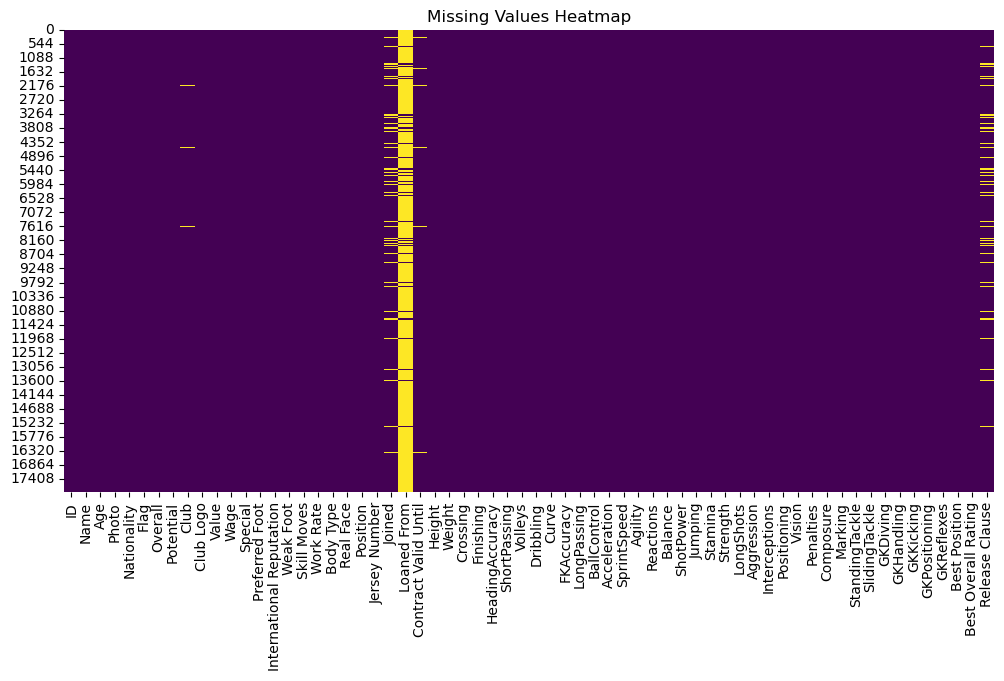

In [17]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [18]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17927, 61)

In [19]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [20]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0   <span class="pos pos26">LS             LS            CF
1  <span class="pos pos13">RCM            RCM           CDM
2    <span class="pos pos3">RB             RB            CF
3    <span class="pos pos7">LB             LB            LB
4  <span class="pos pos15">LCM            LCM            CM
5   <span class="pos pos23">RW             RW            ST
6  <span class="pos pos28">SUB            SUB           CDM
7  <span class="pos pos13">RCM            RCM           CAM
8    <span class="pos pos7">LB             LB           LWB
9    <span class="pos pos7">LB             LB            LB


In [21]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 15549
                  Name Position_clean Best Position
0            L. Suárez             LS            CF
1        R. Nainggolan            RCM           CDM
2          A. Florenzi             RB            CF
4             P. Pogba            LCM            CM
5              G. Bale             RW            ST
6             A. Vidal            SUB           CDM
7         K. De Bruyne            RCM           CAM
8           Jordi Alba             LB           LWB
10           L. Modrić            RCM            CM
11   Cristiano Ronaldo             LW            ST


In [22]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Position_clean
0,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,500000.0,2321,...,38.0,27.0,25.0,31.0,33.0,37.0,CF,88.0,€198.9M,LS
1,178518,R. Nainggolan,29,Belgium,86,86,Roma,42500000.0,130000.0,2286,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,€72.3M,RCM
2,203551,A. Florenzi,26,Italy,82,83,Roma,21000000.0,70000.0,2267,...,78.0,9.0,8.0,10.0,11.0,10.0,CF,81.0,€37.3M,RB
3,197445,D. Alaba,25,Austria,85,87,FC Bayern München,38500000.0,130000.0,2263,...,80.0,5.0,7.0,14.0,15.0,9.0,LB,82.0,€66.4M,LB
4,195864,P. Pogba,24,France,88,92,Manchester United,76000000.0,250000.0,2262,...,68.0,5.0,6.0,2.0,4.0,3.0,CM,85.0,€146.3M,LCM


In [23]:
#What is the special column?
fifa['Special'].describe()

count    17927.000000
mean      1593.601272
std        273.732447
min        742.000000
25%       1450.000000
50%       1632.000000
75%       1784.000000
max       2321.000000
Name: Special, dtype: float64

count    17927.000000
mean      1593.601272
std        273.732447
min        742.000000
25%       1450.000000
50%       1632.000000
75%       1784.000000
max       2321.000000
Name: Special, dtype: float64


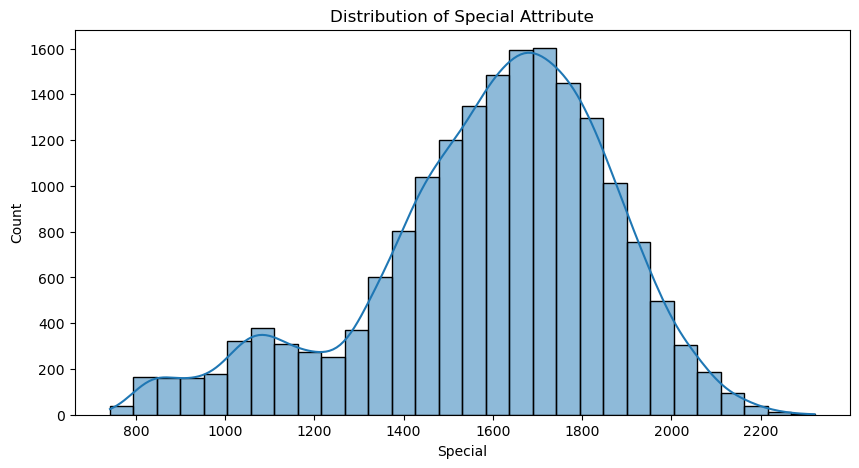

             Name  Special  Overall  Potential               Club
0       L. Suárez     2321       92         92       FC Barcelona
1   R. Nainggolan     2286       86         86               Roma
2     A. Florenzi     2267       82         83               Roma
3        D. Alaba     2263       85         87  FC Bayern München
4        P. Pogba     2262       88         92  Manchester United
5         G. Bale     2260       88         88        Real Madrid
6        A. Vidal     2253       86         86  FC Bayern München
7    K. De Bruyne     2234       91         92    Manchester City
8      Jordi Alba     2231       87         87       FC Barcelona
9      A. Kolarov     2231       81         81               Roma


In [24]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [25]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [26]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'Normal (185+)' 'C. Ronaldo' 'Lean (170-)' 'Messi'
 'Shaqiri' 'Neymar' 'Normal (190+)' 'Stocky (170-)' 'Stocky (185+)'
 'Akinfenwa' 'Courtois']
                     Name   Body Type  Overall  Special                 Club
11      Cristiano Ronaldo  C. Ronaldo       94     2228          Real Madrid
55               L. Messi       Messi       94     2161         FC Barcelona
145            X. Shaqiri     Shaqiri       82     2112           Stoke City
155                Neymar      Neymar       92     2105  Paris Saint-Germain
10096        A. Akinfenwa   Akinfenwa       66     1594    Wycombe Wanderers
15515         T. Courtois    Courtois       89     1298              Chelsea


In [27]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    6221
Lean             Lean (170-185)      3969
Normal           Normal (185+)       3611
Lean             Lean (185+)         1910
Normal           Normal (170-)        628
Stocky           Stocky (170-185)     625
Lean             Lean (170-)          436
Stocky           Stocky (185+)        402
                 Stocky (170-)        115
Normal           Normal (190+)          4
Neymar           Neymar                 1
Courtois         Courtois               1
Akinfenwa        Akinfenwa              1
Messi            Messi                  1
C. Ronaldo       C. Ronaldo             1
Shaqiri          Shaqiri                1
Name: count, dtype: int64


In [28]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height  Weight
0    6'0  190lbs
1    5'9  170lbs
2    5'8  148lbs
3   5'11  168lbs
4    6'3  185lbs
5    6'1  179lbs
6   5'11  165lbs
7   5'11  150lbs
8    5'7  150lbs
9    6'2  183lbs


In [29]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0    182.88
1    175.26
2    172.72
3    180.34
4    190.50
Name: Height, dtype: float64


In [30]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

86.18


13230    89.811216
13231    77.110640
13232    84.821704
13233    83.007336
13234    83.914520
13235    84.821704
13236    74.842680
13237    74.842680
13238    73.028312
Name: Weight, dtype: float64

In [31]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height     Weight
0  182.88  86.182480
1  175.26  77.110640
2  172.72  67.131616
3  180.34  76.203456
4  190.50  83.914520
5  185.42  81.192968
6  180.34  74.842680
7  180.34  68.038800
8  170.18  68.038800
9  187.96  83.007336


In [32]:
fifa['Joined'] = pandas_df['Joined']

In [33]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2014-07-11
1   2014-01-07
2   2010-07-01
3   2010-02-10
4   2016-08-09
5   2013-09-02
6   2015-07-28
7   2015-08-30
8   2012-07-01
9   2017-07-22
Name: Joined, dtype: datetime64[ns]


In [34]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ Medium,High,Medium
3,High/ Medium,High,Medium
4,High/ Low,High,Low
5,High/ Medium,High,Medium
6,High/ High,High,High
7,High/ High,High,High
8,High/ Medium,High,Medium
9,High/ Medium,High,Medium


In [35]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

  Loaned From Loaned From_clean
0         NaN              None
1         NaN              None
2         NaN              None
3         NaN              None
4         NaN              None
5         NaN              None
6         NaN              None
7         NaN              None
8         NaN              None
9         NaN              None


In [36]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
Juventus                20
Inter                   20
Atalanta                19
Roma                    17
Udinese                 17
SL Benfica              16
Sporting CP             15
Derby County            13
FC Porto                13
Zenit St. Petersburg    13
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [37]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'Position_clean', 'Body Type Clean', 'Attacking Work Rate',
       'Defensive Work Rate', 'Loaned From_clean'],
      dtype='object')


In [38]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,500000.0,2321,...,33.0,37.0,CF,88.0,€198.9M,LS,Normal,High,Medium,None
1,178518,R. Nainggolan,29,Belgium,86,86,Roma,42500000.0,130000.0,2286,...,8.0,11.0,CDM,84.0,€72.3M,RCM,Stocky,High,High,None
2,203551,A. Florenzi,26,Italy,82,83,Roma,21000000.0,70000.0,2267,...,11.0,10.0,CF,81.0,€37.3M,RB,Lean,High,Medium,None
3,197445,D. Alaba,25,Austria,85,87,FC Bayern München,38500000.0,130000.0,2263,...,15.0,9.0,LB,82.0,€66.4M,LB,Lean,High,Medium,None
4,195864,P. Pogba,24,France,88,92,Manchester United,76000000.0,250000.0,2262,...,4.0,3.0,CM,85.0,€146.3M,LCM,Lean,High,Low,None
5,173731,G. Bale,27,Wales,88,88,Real Madrid,62000000.0,375000.0,2260,...,5.0,6.0,ST,87.0,€127.1M,RW,Lean,High,Medium,None
6,181872,A. Vidal,30,Chile,86,86,FC Bayern München,33000000.0,160000.0,2253,...,2.0,4.0,CDM,84.0,€54.5M,SUB,Normal,High,High,None
7,192985,K. De Bruyne,26,Belgium,91,92,Manchester City,104500000.0,400000.0,2234,...,10.0,13.0,CAM,88.0,€201.2M,RCM,Normal,High,High,None
8,189332,Jordi Alba,28,Spain,87,87,FC Barcelona,40000000.0,250000.0,2231,...,6.0,13.0,LWB,85.0,€82M,LB,Normal,High,Medium,None
9,185103,A. Kolarov,31,Serbia,81,81,Roma,11500000.0,70000.0,2231,...,16.0,6.0,LB,81.0,€19.6M,LB,Normal,High,Medium,None


In [39]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17927  │ │ float64     │ 43    │                                                          │
│ │ Number of columns │ 62     │ │ string      │ 13    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA ┃ NA %       ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID          │  0 │          0 │  210900 │   31100 │    16 │ 197800 │ 216600 │  233800 │    248100 │    ▁▃▇ │  │
│ │ Age         │  0 │          0 │   24.61 │   4.664 │    15 │     21 │     24 │      28 │        44 │  ▃▇▇▃  │  │
│ │ Overall     │  0 │          0 │   66.22 │   6.918 │    46 │     62 │     66 │      71 │        94 │ ▁▃▇▅▁  │  │
│ │ Potential   │  0 │          0 │   71.29 │   6.035 │    46 │     67 │     71 │      75 │        94 │  ▁▆▇▂  │  │
│ │ Value       │  0 │          0 │ 2395000 │ 5516000 │     0 │ 325000 │ 700000 │ 2000000 │ 119500000 │   ▇    │  │
│ │ Wage        │  0 │          0 │   10980 │   22560 │     0 │   2000 │   4000 │   10000 │    575000 │   ▇    │  │
│ │ Special     │  0 │          0 │    1594 │   273.7 │   742 │   1450 │   1632 │    1784 │      2321 │ ▁▂▅▇▅  │  │
│ │ Internation │  0 │          0 │   1.118 │  0.3985 │     1 │      1 │      1 │       1 │         5 │   ▇▁   │  │
│ │ al          │    │            │         │         │       │        │        │         │           │        │  │
│ │ Reputation  │    │            │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot   │  0 │          0 │   2.948 │  0.6577 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill Moves │  0 │          0 │   2.327 │  0.7515 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▅▁  │  │
│ │ Jersey      │ 19 │ 0.10598538 │   20.73 │   17.04 │     1 │      9 │     18 │      27 │        99 │  ▇▆▁   │  │
│ │ Number      │    │  517320243 │         │         │       │        │        │         │           │        │  │
│ │ Height      │  0 │          0 │   181.3 │    6.73 │ 154.9 │  175.3 │  180.3 │   185.4 │     205.7 │  ▁▅▇▂  │  │
│ │ Weight      │  0 │          0 │   75.31 │   7.028 │ 48.99 │  69.85 │  74.84 │   79.83 │     110.2 │   ▃▇▃  │  │
│ │ Crossing    │  0 │          0 │   49.74 │   18.43 │     5 │     38 │     54 │      64 │        92 │ ▃▃▅▇▇▁ │  │
│ │ Finishing   │  0 │          0 │   45.33 │   19.54 │     2 │     30 │     48 │      62 │        95 │ ▃▅▆▇▆  │  │
│ │ HeadingAccu │  0 │          0 │   52.25 │   17.46 │     4 │     45 │     55 │      64 │        94 │ ▂▁▃▇▅  │  │
│ │ racy        │    │            │         │         │       │        │        │         │           │        │  │
│ │ ShortPassin │  0 │          0 │   58.47 │   14.83 │ 

## Graphs(temp)

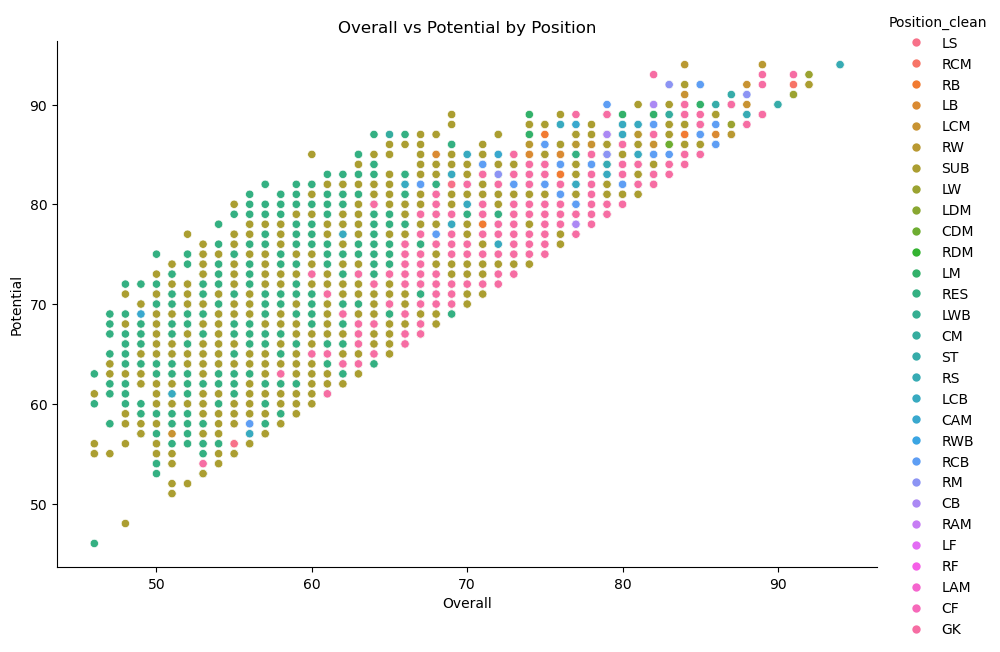

In [40]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [41]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                     Name  Overall  Potential                 Club   Wage
11      Cristiano Ronaldo       94         94          Real Madrid  €575K
55               L. Messi       94         94         FC Barcelona  €575K
202             P. Dybala       89         94             Juventus  €200K
235             K. Mbappé       84         94  Paris Saint-Germain   €80K
155                Neymar       92         93  Paris Saint-Germain  €275K
13152              De Gea       91         93    Manchester United  €300K
15534            J. Oblak       89         93      Atlético Madrid   €80K
15705       G. Donnarumma       82         93                Milan   €30K
0               L. Suárez       92         92         FC Barcelona  €500K
4                P. Pogba       88         92    Manchester United  €250K


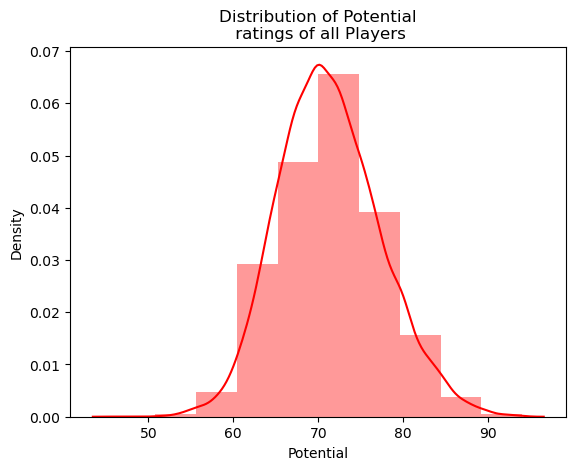

In [42]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [43]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                     Name  Overall  Potential                 Club   Wage
11      Cristiano Ronaldo       94         94          Real Madrid  €575K
55               L. Messi       94         94         FC Barcelona  €575K
0               L. Suárez       92         92         FC Barcelona  €500K
155                Neymar       92         93  Paris Saint-Germain  €275K
12712            M. Neuer       92         92    FC Bayern München  €225K
7            K. De Bruyne       91         92      Manchester City  €400K
69         R. Lewandowski       91         91    FC Bayern München  €350K
124             E. Hazard       91         91              Chelsea  €400K
13152              De Gea       91         93    Manchester United  €300K
30               T. Kroos       90         90          Real Madrid  €325K


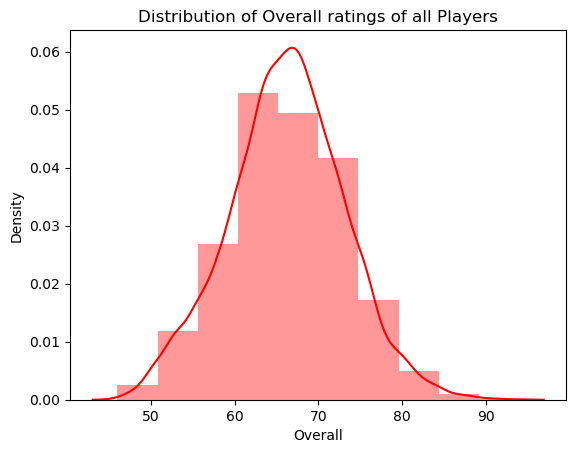

In [44]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [45]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final18.csv', index=False)